# Cardio Data Analysis

Source: *https://www.kaggle.com/datasets/deependraverma13/cardio-activities*

In [129]:
import pandas as pd
import numpy as np
import calendar

In [130]:
path = '/home/lisa/Documents/Datasets/cardioActivities.csv'
cardio_df = pd.read_csv(path)

<br>

## Initial Data Exploration

In [131]:
cardio_df.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [132]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

In [133]:
cardio_df[cardio_df['Average Heart Rate (bpm)'].isnull()]

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
23,2018-07-20 08:01:51,83e5d964-2630-475d-9c17-d906ddd59eb0,Running,NaN,11.01,59:18,5:23,11.14,795.0,85,NaN,NaN,NaN,2018-07-20-080151.gpx
24,2018-07-18 08:08:39,1906f2c4-e77e-4364-98f2-f4eb1d8c9960,Running,NaN,11.04,55:41,5:03,11.90,801.0,87,NaN,NaN,NaN,2018-07-18-080839.gpx
87,2017-09-22 12:27:14,4817879b-dedb-4b3d-a2e8-92d41757ccea,Cycling,NaN,49.18,2:42:32,3:18,18.15,852.0,367,NaN,NaN,NaN,2017-09-22-122714.gpx
125,2017-05-17 18:18:34,f53266a4-2f39-4c18-ad50-6fd60ab34285,Running,NaN,13.82,1:10:59,5:08,11.68,1000.0,128,NaN,NaN,NaN,2017-05-17-181834.gpx
141,2017-03-26 17:10:40,2c90030a-14cb-46e6-8152-646bccabe3b5,Running,NaN,14.62,1:21:54,5:36,10.71,1062.0,149,NaN,NaN,NaN,2017-03-26-171040.gpx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,NaN,1.48,17:56,12:09,4.94,942192.0,12,NaN,NaN,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,NaN,1.49,13:43,9:14,6.49,924486.0,9,NaN,NaN,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,NaN,NaN,NaN,2012-08-24-081312.gpx


<br>

## Data Cleaning

### Drop Irrelevant Data

After inspecting the data columns one by one, I have decided to delete the following, as they do not hold information relevant for the purpose of this analysis or as they have too many missing values:<br> 
 - Activity Id
 - Route Name
 - Calories Burned
 - Average Heart Rate(bpm)
 - Friend's Tagged
 - Notes
 - GPX File

In [134]:
cardio = cardio_df.drop(columns=['Activity Id', 'Route Name', 'Calories Burned', 'Average Heart Rate (bpm)', "Friend's Tagged", 'Notes', 'GPX File'])

In [135]:
cardio

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170
...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,Walking,1.57,13:39,8:41,6.91,7
504,2012-08-24 12:59:42,Walking,1.48,17:56,12:09,4.94,12
505,2012-08-24 10:12:16,Walking,1.49,13:43,9:14,6.49,9
506,2012-08-24 08:13:12,Running,3.15,16:00,5:05,11.82,17


### Tidy Up Columns

Dividing Recording Date and Time into separate columns for detailed analysis purpose:

In [136]:
# Format object dtype to datetime:
cardio['Date'] = pd.to_datetime(cardio.Date)

In [137]:
# Create new columns:
cardio['Record Date'] = cardio['Date'].dt.date
cardio['Record Time'] = cardio['Date'].dt.time

Add 'Weekday' and 'Daytime' columns to interpret the data during the analysis:

In [138]:
# Turn datetime objects into weekday names, add them to a list and turn list into Series to add to cardio DF:
cardio['Record Date'] = pd.to_datetime(cardio['Record Date'])

weekday_list = []

for entry in cardio['Record Date']:
    weekday_list.append(entry.day_name())

cardio['Weekday'] = pd.Series(weekday_list)

In [139]:
# Create 'Daytime' column with boolean masking:
time = cardio['Date'].dt.hour

cardio['Daytime'] = np.select([
    (time >= 6) & (time < 12),
    (time >= 12) & (time < 14),
    (time >= 14) & (time < 18),
    (time >= 18) & (time < 21),
    (time >= 21) | (time < 6)
], ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night'])

In [140]:
# Create 'Month' column:
month_list = []

for entry in cardio['Date']:
    month = entry.month
    month_list.append(calendar.month_name[month])

cardio['Month'] = pd.Series(month_list)

In [141]:
# Create 'Year' column:
year_list = []

for entry in cardio['Date']:
    year_list.append(entry.year)

cardio['Year'] = pd.Series(year_list)

Clean up column order and drop irrelevant 'Date' column:


In [144]:
cardio_df = cardio[['Record Date', 'Year', 'Month', 'Weekday', 'Record Time', 'Daytime', 'Type', 'Distance (km)', 'Duration', 'Average Pace', 'Average Speed (km/h)', 'Climb (m)']]

In [145]:
cardio_df

,Record Date,Year,Month,Weekday,Record Time,Daytime,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m)
0,2018-11-11,2018,November,Sunday,14:05:12,Afternoon,Running,10.44,58:40,5:37,10.68,130
1,2018-11-09,2018,November,Friday,15:02:35,Afternoon,Running,12.84,1:14:12,5:47,10.39,168
2,2018-11-04,2018,November,Sunday,16:05:00,Afternoon,Running,13.01,1:15:16,5:47,10.37,171
3,2018-11-01,2018,November,Thursday,14:03:58,Afternoon,Running,12.98,1:14:25,5:44,10.47,169
4,2018-10-27,2018,October,Saturday,17:01:36,Afternoon,Running,13.02,1:12:50,5:36,10.73,170
...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28,2012,August,Tuesday,07:06:57,Morning,Walking,1.57,13:39,8:41,6.91,7
504,2012-08-24,2012,August,Friday,12:59:42,Noon,Walking,1.48,17:56,12:09,4.94,12
505,2012-08-24,2012,August,Friday,10:12:16,Morning,Walking,1.49,13:43,9:14,6.49,9
506,2012-08-24,2012,August,Friday,08:13:12,Morning,Running,3.15,16:00,5:05,11.82,17


### Type of Activity Differentiation

Create separate DataFrames dividing the data by activity type to simplify syntax during analysis:

In [146]:
cardio_df['Type'].unique()

array(['Running', 'Cycling', 'Other', 'Walking'], dtype=object)

In [147]:
running = cardio_df.loc[cardio_df['Type'] == 'Running']

In [148]:
walking = cardio_df.loc[cardio_df['Type'] == 'Walking']

In [149]:
cycling = cardio_df.loc[cardio_df['Type'] == 'Cycling']

In [150]:
other = cardio_df.loc[cardio_df['Type'] == 'Other']

<br>

## Exploratory Analysis

In [151]:
cardio_df.drop(columns=['Record Date']).describe()

,Year,Distance (km),Average Speed (km/h),Climb (m)
count,508.000000,508.000000,508.000000,508.00000
mean,2015.297244,11.757835,11.341654,128.00000
std,1.821478,6.209219,2.510516,108.52604
min,2012.000000,0.760000,1.040000,0.00000
25%,2014.000000,7.015000,10.470000,53.00000
50%,2015.000000,11.460000,11.030000,92.00000
75%,2017.000000,13.642500,11.642500,172.25000
max,2018.000000,49.180000,24.330000,982.00000


### Overview of upcoming Analysis Points:

#### I. General Observations: Activity Frequency Distribution

    1. Cardio Distribution per Year
        - Year with Highest Activity
        - Activity Ranking per Year
        - Visualization: Activity over the Years

    2. Cardio Distribution per Month
        - Month with Highest Activity
        - Activity Ranking per Month
        - Visualization: Activity per Month

    3. Cardio Distribution per Weekday
        - Weekday with Highest Activity
        - Activity Ranking per Weekday
        - Visualization: Activity per Weekday

    4. Cardio Distribution per Daytime
        - Daytime with Highest Activity
        - Activity Ranking per Daytime
        - Visualization: Activity over the Day

    5. Cardio Distribution per Type
        - Most Common Activity
        - Training Count per Activity Type Ranking
        - Visualization: Training Count per Activity Type

#### II. Focused Observations: Running Statistics

    1. Speed
        - Achievements
        - Development

    2. Distance
        - Achievements
        - Development

    3. Climb
        - Achievements
        - Development

    4. Pace
        - Achievements
        - Development

    5. Duration
        - Achievements
        - Development    

<br>

### I. General Observations: Activity Frequency Distribution

#### 1. Cardio Distribution per Year

**Year with Highest Acitivity:**

In [153]:
print(f"{cardio_df['Year'].mode()[0]}: {cardio_df[cardio_df['Year'] == cardio_df['Year'].mode()[0]].count()[0]} Activities")

2015: 92 Activities


**Activity per Year Ranking:**

In [154]:
yearly_activity = cardio_df.groupby('Year')['Year'].count()

In [155]:
yearly_activity.sort_values(ascending=False)

Year
2015    92
2017    88
2016    79
2013    77
2018    71
2014    70
2012    31
Name: Year, dtype: int64

**Visualization - Activity over the Years:**

<Axes: title={'center': 'Yearly Activity'}, xlabel='Year', ylabel='Activity Count'>

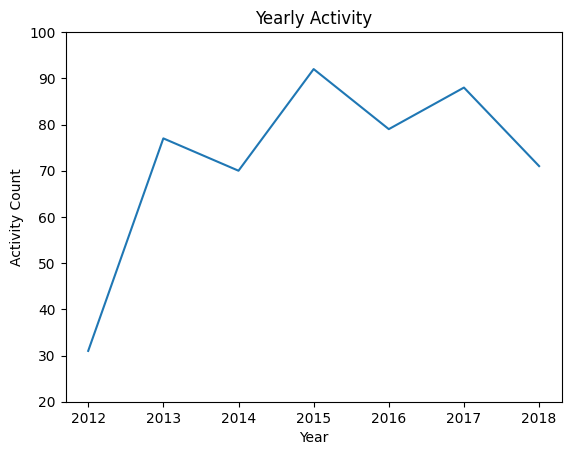

In [158]:
yearly_activity.plot(kind='line', x='Year', y=yearly_activity, title='Yearly Activity', xlabel='Year', ylabel='Activity Count', ylim=(20,100))

<br>

#### 2. Cardio Distribution per Month

**Month with Highest Activity:**

In [159]:
print(f"{cardio_df['Month'].mode()[0]}: {cardio_df[cardio_df['Month'] == cardio_df['Month'].mode()[0]].count()[0]} Activities")

August: 58 Activities


**Activity per Month Rating:**

In [160]:
monthly_activity = cardio_df.groupby('Month')['Month'].count()

In [161]:
monthly_activity.sort_values(ascending=False)

Month
August       58
May          54
July         51
June         50
September    50
April        47
October      40
February     35
November     34
March        31
December     29
January      29
Name: Month, dtype: int64

**Visualization - Activity per Month:**

In [162]:
# Because of the earlier decision during data cleanup to give the columns distinctive and easily understandable names, 
# the months can now not be automatically sorted in accordance with their timely occurence during a year.
# For visualization purposes the monthly activity will be first sorted within a dictionary and then transformed into a 
# pandas Series object from which a plot can be derived.

In [163]:
monthly_activity_dict = monthly_activity.to_dict()
ordered_months = list(calendar.month_name)[1:]

sorted_monthly_activity_dict = {}
for month in ordered_months:
    sorted_monthly_activity_dict[month]= monthly_activity_dict[month]
sorted_monthly_activity = pd.Series(sorted_monthly_activity_dict)
sorted_monthly_activity

January      29
February     35
March        31
April        47
May          54
June         50
July         51
August       58
September    50
October      40
November     34
December     29
dtype: int64

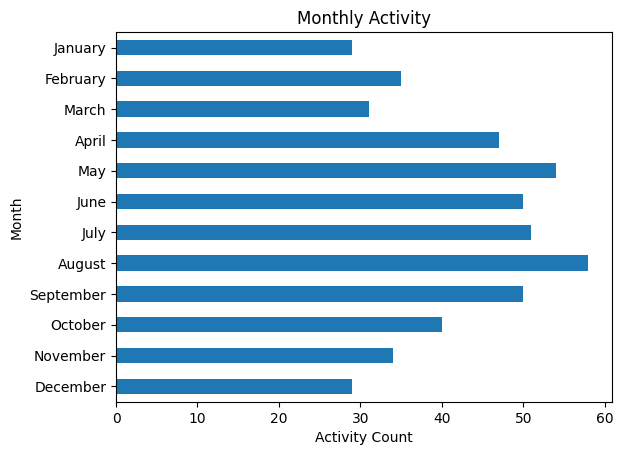

In [203]:
month_plot = sorted_monthly_activity.plot(kind='barh', title='Monthly Activity', xlabel='Activity Count', ylabel='Month')
month_plot.invert_yaxis()

<br>

#### 3. Cardio Distribution per Weekday

**Weekday with Highest Activity:**

In [165]:
print(f"{cardio_df['Weekday'].mode()[0]}: {cardio_df[cardio_df['Weekday'] == cardio_df['Weekday'].mode()[0]].count()[0]} Activities")

Monday: 95 Activities


**Activity per Weekday Ranking:**

In [166]:
weekly_activity = cardio_df.groupby('Weekday')['Weekday'].count()

In [167]:
weekly_activity.sort_values(ascending=False)

Weekday
Monday       95
Wednesday    86
Sunday       81
Thursday     81
Saturday     66
Tuesday      64
Friday       35
Name: Weekday, dtype: int64

**Visualization - Activity per Weekday:**

In [168]:
# Because of the earlier decision during data cleanup to give the columns distinctive and easily understandable names, 
# the weekdays can now not be automatically sorted in accordance with their timely occurence during the week.
# For visualization purposes the weekly activity will be first sorted within a dictionary and then transformed into a 
# pandas Series object from which a plot can be derived.

In [169]:
weekly_activity_dict = weekly_activity.to_dict()
ordered_weekdays = list(calendar.day_name)

sorted_weekly_activity_dict = {}
for day in ordered_weekdays:
    sorted_weekly_activity_dict[day]= weekly_activity_dict[day]
sorted_weekly_activity = pd.Series(sorted_weekly_activity_dict)
sorted_weekly_activity

Monday       95
Tuesday      64
Wednesday    86
Thursday     81
Friday       35
Saturday     66
Sunday       81
dtype: int64

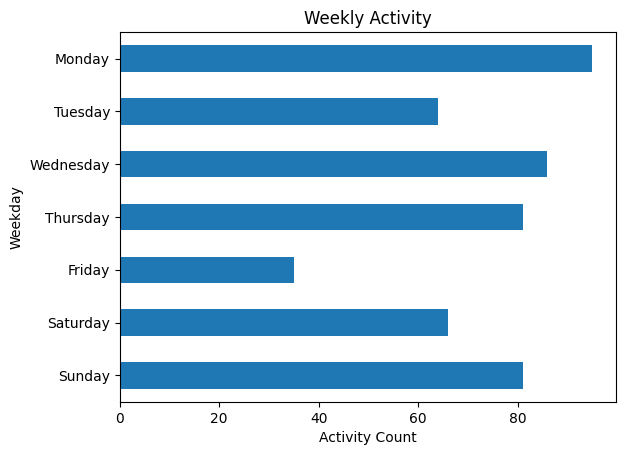

In [170]:
week_plot = sorted_weekly_activity.plot(kind='barh', title='Weekly Activity', xlabel='Activity Count', ylabel='Weekday')
week_plot.invert_yaxis()

<br>

#### 4. Cardio Distribution per Daytime

**Daytime with Highest Activity:**

In [171]:
print(f"{cardio_df['Daytime'].mode()[0]}: {cardio_df[cardio_df['Daytime'] == cardio_df['Daytime'].mode()[0]].count()[0]} Activities")

Evening: 310 Activities


**Activity per Daytime Ranking:**

In [172]:
daytime_activity = cardio_df.groupby('Daytime')['Daytime'].count()

In [173]:
daytime_activity.sort_values(ascending=False)

Daytime
Evening      310
Afternoon    103
Morning       77
Noon          16
Night          2
Name: Daytime, dtype: int64

**Visualization - Activity over the Day:**

In [174]:
# Because of the earlier decision during data cleanup to give the columns distinctive and easily understandable names, 
# the daytimes can now not be automatically sorted in accordance with their timely occurence during the day.
# For visualization purposes the daytime activity will be first sorted within a dictionary and then transformed into a 
# pandas Series object from which a plot can be derived.

In [175]:
daytime_activity_dict = daytime_activity.to_dict()
ordered_daytimes = ['Morning', 'Noon', 'Afternoon', 'Evening', 'Night']

sorted_daytime_activity_dict = {}
for daytime in ordered_daytimes:
    sorted_daytime_activity_dict[daytime]= daytime_activity_dict[daytime]
sorted_daytime_activity = pd.Series(sorted_daytime_activity_dict)
sorted_daytime_activity

Morning       77
Noon          16
Afternoon    103
Evening      310
Night          2
dtype: int64

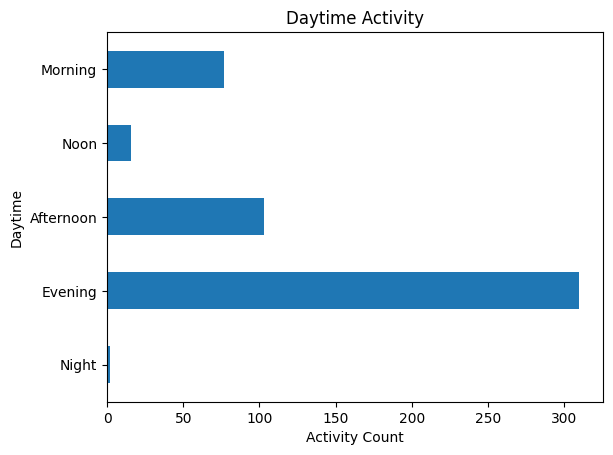

In [176]:
daytime_plot = sorted_daytime_activity.plot(kind='barh', title='Daytime Activity', xlabel='Activity Count', ylabel='Daytime')
daytime_plot.invert_yaxis()

<br>

#### 5. Cardio Distribution per Type

**Most Common Activity:**

In [177]:
print(f"{cardio_df['Type'].mode()[0]}: {cardio_df[cardio_df['Type'] == cardio_df['Type'].mode()[0]].count()[0]} Trainings")

Running: 459 Trainings


**Training Count per Activity Type Ranking:**

In [178]:
type_activity = cardio_df.groupby('Type')['Type'].count()

In [179]:
type_activity.sort_values(ascending=False)

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

**Visualization - Training Count per Type:**

<Axes: title={'center': 'Training per Activity Type'}>

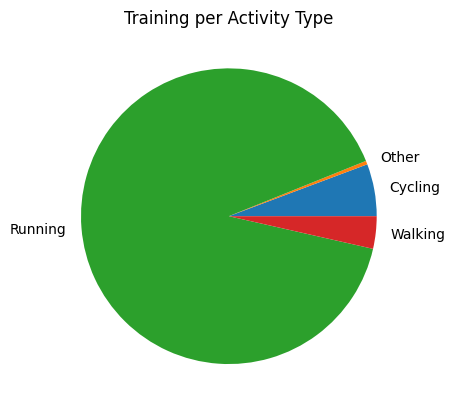

In [180]:
type_activity.plot.pie(title='Training per Activity Type', ylabel="")

<br>

### II. Focused Observations: Running Statistics

Since the previous analysis has shown the user's preference for running as their main cardio activity, the following analysis focuses on the user's specific running statistics.

#### 1. Speed

##### **Achievements:**

In [181]:
print(
    f"Average Speed: {running['Average Speed (km/h)'].mean().round(2)} km/h \n",
    f"Top Speed: {running['Average Speed (km/h)'].max()} km/h \n",
    f"Min Speed: {running['Average Speed (km/h)'].min()} km/h"
)

Average Speed: 11.06 km/h 
 Top Speed: 20.72 km/h 
 Min Speed: 5.77 km/h


##### **Development:**

In [182]:
speed_per_year = running.groupby('Year')['Average Speed (km/h)'].mean().round(2)
speed_per_year

Year
2012    10.67
2013    11.40
2014    11.52
2015    11.00
2016    10.84
2017    10.96
2018    10.78
Name: Average Speed (km/h), dtype: float64

<Axes: title={'center': 'Speed Development over the Years'}, xlabel='Year', ylabel='Average Speed (km/h)'>

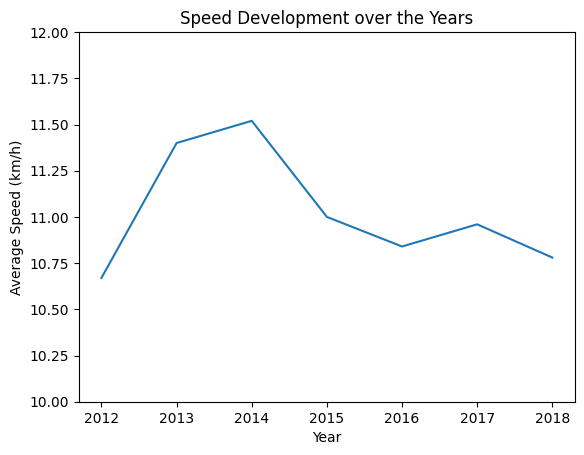

In [183]:
speed_per_year.plot.line(title='Speed Development over the Years', ylabel='Average Speed (km/h)', ylim=(10,12))

<br>

#### 2. Distance

##### **Achievements:**

In [184]:
print(
    f"Average Distance: {running['Distance (km)'].mean().round(2)} km \n",
    f"Top Distance: {running['Distance (km)'].max()} km \n",
    f"Min Distance: {running['Distance (km)'].min()} km \n\n",
    f"Total Distance: {running['Distance (km)'].sum()} km"
)

Average Distance: 11.38 km 
 Top Distance: 38.32 km 
 Min Distance: 0.76 km 

 Total Distance: 5224.5 km


##### **Development:**

In [185]:
distance_per_year = running.groupby('Year')['Distance (km)'].mean().round(2)
distance_per_year

Year
2012     3.82
2013     7.55
2014    10.95
2015    13.60
2016    11.41
2017    12.94
2018    13.34
Name: Distance (km), dtype: float64

<Axes: title={'center': 'Distance Development over the Years'}, xlabel='Year', ylabel='Average Distance (km)'>

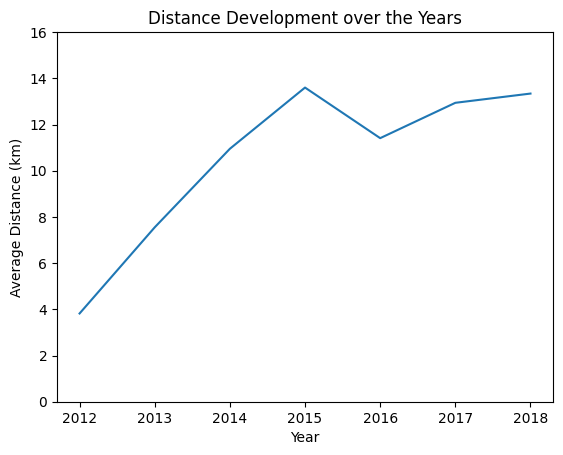

In [186]:
distance_per_year.plot.line(title='Distance Development over the Years', xlabel='Year', ylabel='Average Distance (km)', ylim=(0,16))

<br>

#### 3. Climb

##### **Achievements:**

In [187]:
print(
    f"Average Climb: {running['Climb (m)'].mean().round(2)} m \n",
    f"Top Climb: {running['Climb (m)'].max()} m \n",
    f"Min Climb: {running['Climb (m)'].min()} m \n\n",
    f"Total Climb: {running['Climb (m)'].sum()} m"
)

Average Climb: 124.79 m 
 Top Climb: 982 m 
 Min Climb: 0 m 

 Total Climb: 57278 m


##### **Development:**

In [188]:
climb_per_year = running.groupby('Year')['Climb (m)'].mean().round(2)
climb_per_year

Year
2012     20.67
2013     45.17
2014     65.28
2015    160.17
2016    133.19
2017    169.38
2018    191.22
Name: Climb (m), dtype: float64

<Axes: title={'center': 'Climb Development over the Years'}, xlabel='Year', ylabel='Climb (m)'>

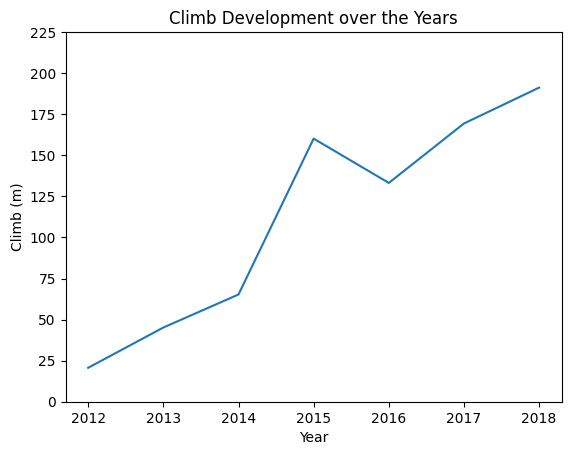

In [189]:
climb_per_year.plot.line(title='Climb Development over the Years', xlabel='Year', ylabel='Climb (m)', ylim=(0,225))

<br>

#### 4. Pace

##### **Achievements:**

In [190]:
# Problem is that column values are expressed as Python objects (str) and cannot be aggregated like this
running['Average Pace']

0      5:37
1      5:47
2      5:47
3      5:44
4      5:36
       ... 
494    4:52
495    5:12
498    5:11
506    5:05
507    5:29
Name: Average Pace, Length: 459, dtype: object

In [191]:
# Function to express string values as integers
def str_to_sec(time_str):
    time_tuple = time_str.split(':')
    if len(time_tuple) > 2:
        return (int(time_tuple[0])*3600 + int(time_tuple[1])*60 + int(time_tuple[2]))
    else:
        return (int(time_tuple[0])*60 + int(time_tuple[1]))

In [192]:
pace = running['Average Pace']

pace_seconds = np.vectorize(str_to_sec)

pace_mean = int(pace_seconds(pace).mean())
pace_max = int(pace_seconds(pace).max())
pace_min = int(pace_seconds(pace).min())

In [193]:
print(
    f"Average Pace: {pace_mean/60} minutes \n",
    f"Fastest Pace: {pace_min/60} minutes \n",
    f"Slowest Pace: {pace_max/60} minutes"
)

Average Pace: 5.45 minutes 
 Fastest Pace: 2.9 minutes 
 Slowest Pace: 10.4 minutes


##### **Development:**

In [194]:
activity_years = sorted(list(running['Year'].unique()))
pace_dict = {year: round(int(pace_seconds(running.loc[(running['Year'] == year)]['Average Pace']).mean())/60, 2) for year in activity_years}
pace_dev = pd.Series(pace_dict)
pace_dev

2012    5.75
2013    5.33
2014    5.22
2015    5.48
2016    5.55
2017    5.48
2018    5.58
dtype: float64

<Axes: title={'center': 'Pace Development over the Years'}, xlabel='Year', ylabel='Pace (min)'>

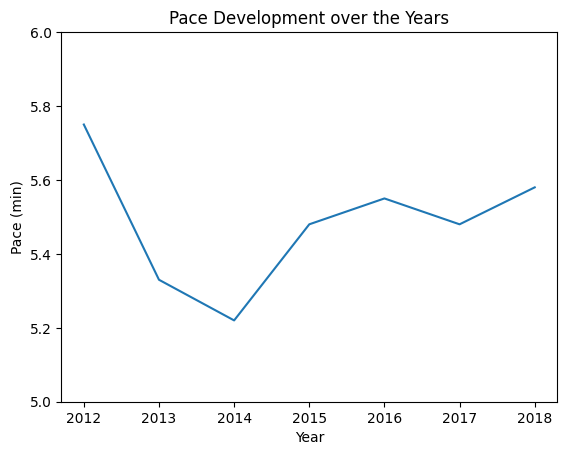

In [195]:
pace_dev.plot.line(title='Pace Development over the Years', xlabel='Year', ylabel='Pace (min)', ylim=(5,6))

<br>

#### 5. Duration

##### **Achievements:**

In [196]:
# Same issue like Pace
running['Duration']

0        58:40
1      1:14:12
2      1:15:16
3      1:14:25
4      1:12:50
        ...   
494      15:55
495      32:35
498      16:16
506      16:00
507      31:08
Name: Duration, Length: 459, dtype: object

In [197]:
# Function to express string values as integers
def str_to_sec(time_str):
    time_tuple = time_str.split(':')
    if len(time_tuple) > 2:
        return (int(time_tuple[0])*3600 + int(time_tuple[1])*60 + int(time_tuple[2]))
    else:
        return (int(time_tuple[0])*60 + int(time_tuple[1]))

In [198]:
duration = running['Duration']

duration_seconds = np.vectorize(str_to_sec)

dur_mean = int(duration_seconds(duration).mean())
dur_max = int(duration_seconds(duration).max())
dur_min = int(duration_seconds(duration).min())
dur_total = int(duration_seconds(duration).sum())

In [199]:
print(
    f"Average Duration: {round(dur_mean/3600, 2)} hours \n",
    f"Longest Duration: {round(dur_max/3600, 2)} hours \n",
    f"Shortest Duration: {dur_min/60} minutes \n\n",
    f"Total Duration: {round(dur_total/3600, 2)} hours"
)

Average Duration: 1.04 hours 
 Longest Duration: 4.47 hours 
 Shortest Duration: 5.25 minutes 

 Total Duration: 476.01 hours


##### **Development:**

In [200]:
duration_dict = {year: round(int(duration_seconds(running.loc[(running['Year'] == year)]['Duration']).mean())/3600, 2) for year in activity_years}
duration_dev = pd.Series(duration_dict)
duration_dev

2012    0.35
2013    0.67
2014    0.94
2015    1.26
2016    1.06
2017    1.19
2018    1.24
dtype: float64

<Axes: title={'center': 'Duration Development over the Years'}, xlabel='Year', ylabel='Duration (hours)'>

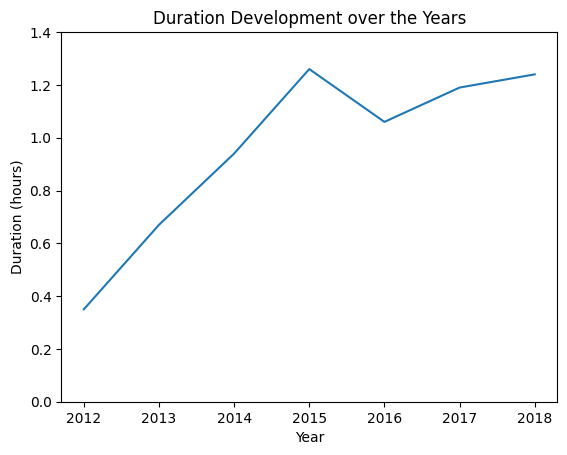

In [201]:
duration_dev.plot.line(title='Duration Development over the Years', xlabel='Year', ylabel='Duration (hours)', ylim=(0,1.4))

<br>